Nama        : Yohanes Paulus Ardha Suban Koten
NPM         : 220711658
Kelompok SB : Transformers
Topik       : Klasifikasi Kematangan Rambutan 
Arsitektur  : AlexNet

In [39]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model 
import matplotlib.pyplot as plt

In [40]:
base_dir = r'C:\Users\ACER\Downloads\AlexNet_A_Transformers_Ardha\train_data'
img_size = 180 
batch = 32 
validation_split = 0.1

In [41]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch,
    validation_split=validation_split,
    subset="validation"
)

Found 300 files belonging to 3 classes.


Using 30 files for validation.


In [42]:
class_names = val_ds.class_names
print("Class Names:", class_names)

Class Names: ['Busuk', 'Matang', 'Mentah']


In [43]:
AUTOTUNE = tf.data.AUTOTUNE

In [44]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch,
    validation_split=validation_split,
    subset="training"
).map(lambda x, y: (data_augmentation(x, training=True), y)) \
 .cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

Found 300 files belonging to 3 classes.
Using 270 files for training.


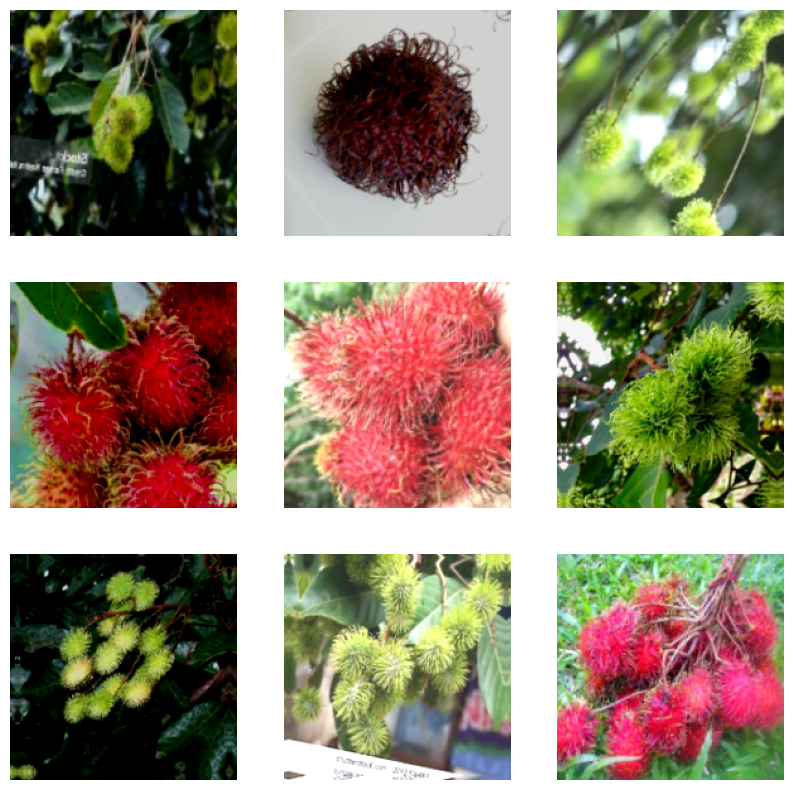

In [45]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        augmented_image = images[i].numpy().astype('uint8')
        plt.imshow(augmented_image)
        plt.axis('off')

In [46]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_size, img_size, 3)),  # Normalization only

    # Convolutional Layers
    layers.Conv2D(96, (11, 11), strides=4, activation='relu'),
    layers.MaxPooling2D((3, 3), strides=2),
    layers.BatchNormalization(),
    
    layers.Conv2D(256, (5, 5), activation='relu', padding='same'),
    layers.MaxPooling2D((3, 3), strides=2),
    layers.BatchNormalization(),
    
    layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((3, 3), strides=2),
    layers.BatchNormalization(),
    
    # Flatten and Fully Connected Layers
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    
    # Output Layer
    layers.Dense(len(class_names), activation='softmax')
])


d:\anaconda\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Reduced learning rate for better convergence
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [48]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 43, 43, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 21, 21, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 21, 21, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 21, 21, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 10, 10, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 10, 10, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 10, 10, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │        12,291 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,324,547 (142.38 MB)

 Trainable params: 37,323,331 (142.38 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [49]:
history = model.fit(
    train_ds,
    epochs=30,
    validation_data=val_ds,
    validation_steps=len(val_ds) // batch,
)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 490ms/step - accuracy: 0.4187 - loss: 1.2972 - val_accuracy: 0.5667 - val_loss: 1.0928
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 461ms/step - accuracy: 0.6934 - loss: 0.7845 - val_accuracy: 0.5333 - val_loss: 1.0887
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 488ms/step - accuracy: 0.7577 - loss: 0.5353 - val_accuracy: 0.3000 - val_loss: 1.0867
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 480ms/step - accuracy: 0.8957 - loss: 0.3283 - val_accuracy: 0.2667 - val_loss: 1.0886
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 455ms/step - accuracy: 0.9614 - loss: 0.1894 - val_accuracy: 0.3333 - val_loss: 1.0853
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 458ms/step - accuracy: 0.8933 - loss: 0.2295 - val_accuracy: 0.5667 - val_loss: 1.0762
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 471ms/step - accuracy: 0.9752 - loss: 0.1224 - val_accuracy: 0.7333 - val_loss: 1.0678
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 450ms/step - accuracy: 0.9425 - loss: 0.1442 - val_accuracy: 0.7333 - val_loss:

In [50]:

epochs_range = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

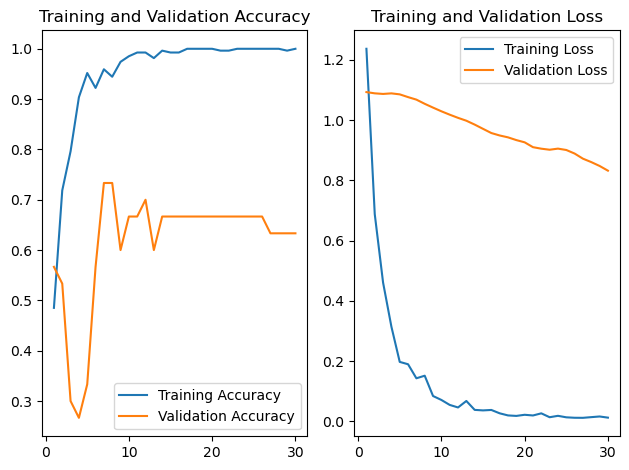

In [51]:
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

In [52]:
model.save('model_AlexNet.h5')

In [53]:

def classify_images(image_path, save_path='predicted_image.jpg'):
    try:
        # Memuat dan mempersiapkan gambar untuk prediksi
        input_image = tf.keras.utils.load_img(image_path, target_size=(img_size, img_size))  # Sesuaikan ukuran input
        input_image_array = tf.keras.utils.img_to_array(input_image)
        input_image_array = input_image_array / 255.0  # Normalisasi
        input_image_exp_dim = tf.expand_dims(input_image_array, 0)  # Menambahkan dimensi batch

        # Melakukan prediksi
        predictions = model.predict(input_image_exp_dim)
        result = tf.nn.softmax(predictions[0])
        class_idx = np.argmax(result) 
        confidence = np.max(result) * 100

        # Menampilkan hasil prediksi dan confidence
        print(f"Prediksi: {class_names[class_idx]}")
        print(f"Confidence: {confidence:.2f}%")

        # Menyimpan gambar asli tanpa teks
        input_image = Image.open(image_path)
        input_image.save(save_path)

        return f"Prediksi: {class_names[class_idx]} dengan confidence {confidence:.2f}%. Gambar asli disimpan di {save_path}."
    except Exception as e:
        return f"Terjadi kesalahan: {e}"


In [54]:
result = classify_images(r'C:\Users\ACER\Downloads\AlexNet_A_Transformers_Ardha\test_data\Mentah\10.jpg', save_path='mentah.jpg')
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Prediksi: Mentah
Confidence: 38.80%
Prediksi: Mentah dengan confidence 38.80%. Gambar asli disimpan di mentah.jpg.


Found 317 files belonging to 3 classes.
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


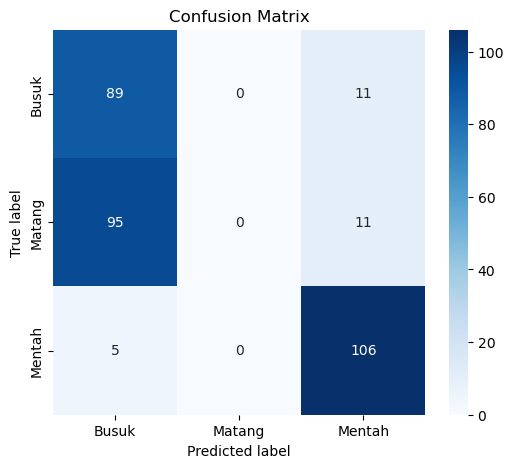

Confusion Matrix:
 [[ 89   0  11]
 [ 95   0  11]
 [  5   0 106]]
Accuracy: 0.6151419558359621
Precision per class: [0.47089947 0.         0.828125  ]
Recall per class: [0.89       0.         0.95495495]
F1 Score per class: [0.61591696 0.         0.88702929]


In [58]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt

# Load model MobileNet
mobileNet_model = load_model(r'C:\Users\ACER\Downloads\AlexNet_A_Transformers_Ardha\model_AlexNet.h5')
class_names = ['Busuk', 'Matang', 'Mentah']

# Load test data
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'test_data',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(180, 180),
    shuffle=False  # Ensure order consistency for predictions
)

# Predict labels
y_pred = mobileNet_model.predict(test_data)
y_pred_class = tf.argmax(y_pred, axis=1)

# Extract true labels
true_labels = []
for _, labels in test_data:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())
true_labels = tf.convert_to_tensor(true_labels)

# Compute confusion matrix
conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class, num_classes=len(class_names))

# Compute metrics
accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)

precision = tf.divide(
    tf.linalg.diag_part(conf_mat),
    tf.reduce_sum(conf_mat, axis=0),
    name="precision"
)
recall = tf.divide(
    tf.linalg.diag_part(conf_mat),
    tf.reduce_sum(conf_mat, axis=1),
    name="recall"
)
f1_score = tf.divide(
    2 * (precision * recall),
    precision + recall,
    name="f1_score"
)

# Handle NaNs in metrics
precision = tf.where(tf.math.is_nan(precision), tf.zeros_like(precision), precision)
recall = tf.where(tf.math.is_nan(recall), tf.zeros_like(recall), recall)
f1_score = tf.where(tf.math.is_nan(f1_score), tf.zeros_like(f1_score), f1_score)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(
    conf_mat.numpy(),
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Display metrics
print("Confusion Matrix:\n", conf_mat.numpy())
print("Accuracy:", accuracy.numpy())
print("Precision per class:", precision.numpy())
print("Recall per class:", recall.numpy())
print("F1 Score per class:", f1_score.numpy())
